<a href="https://colab.research.google.com/github/dhruvikj/petroleum-industry/blob/master/Compressibility%20factor%2C%20viscosity%20and%20density.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hall Method in field unit(PSI,RENKIN)**


In [9]:
pg = float(input("Give Pressure(psia) :- "))
Tg = float(input("Give Temperature(R) :- "))
s = float(input("Give specific gravity :- "))
y = float(input("Give the interval for pressure :-"))

m1 = s*28.96

tc = 168 + 325*s - 12.5*((s)**2)

pc = 677 + 15.0*s -37.5*((s)**2)

print("*************************************************************")

zl = []
pl = []
bgl = []
de1 = []
den = []
while pg > 0 :
  
  p = pg/pc
  #p = round(p,2)

  T = Tg/tc
  #T = round(T,2)

  t = 1/T


  import math as m
  import pandas as pd

  X1 = -0.06125*p*t*(m.exp(-1.2*((1-t)**2)))
  X2 = (14.76*t - 9.76*(t**2) + 4.58*(t**3))
  X3 = (90.76*t - 242.2*(t**2) + 42.4*(t**3))
  X4 = (2.18 + 2.82*t)

  Y = 0.0125*p*t*(m.exp(-1.12*((1-t)**2)))

  #print('AT Pressure(psia) = ',pg)

  #f = X1 + ((Y+(Y**2)+(Y**3)+(Y**4))/((1-Y)**3)) - X2*(Y**2) + X3*(pow(Y,X4))
  #f1 =((1 + 4*Y + 4*(Y**2) - 4*(Y**3) + Y**4 )/((1 - Y)**4)) - 2*X2*Y + *X4*X3*(pow(Y,X4-1))
  
  Yn = 0
  

  while abs(Y - Yn) > 0.000000000000001 :

    Yn = Y

    f = X1 + ((Y+(Y**2)+(Y**3)+(Y**4))/((1-Y)**3)) - X2*(Y**2) + X3*(pow(Y,X4))
    f1 =((1 + 4*Y + 4*(Y**2) - 4*(Y**3) + Y**4 )/((1 - Y)**4)) - 2*X2*Y + X4*X3*(pow(Y,X4-1))

    Y = Y - (f/f1)

  #print("Y =", Y)

  z = ((0.06125*p*t)/Y)*(m.exp(-1.2*((1-t)**2)))

  #print("z = " , round(z,4))
   
  Bg = 0.0287*z*Tg/pg

  #print("Bg = ", round(Bg,4))
    
  
  k = (9.4 + 0.02*(m1))*(pow(Tg,1.5))/(209+19*(m1)+Tg)
  V = 3.5 + (986/Tg) + 0.01*m1
  U = 2.4 - 0.2*V
  d = (0.0014935*pg*m1)/(z*Tg)
  l = (pow(d,U))
  b = V*l
  de = 0.0001*k*(pow(2.71828,b))  
  

  den.append(d)
  zl.append(round(z,4))
  pl.append(pg)  
  bgl.append(round(Bg,4))
  de1.append(de)
  
  
  
  #print("***********************")
  

  pg = pg - y


df = pd.DataFrame(pl,columns =['Pressure(psi)'])
df['Z'] = zl
df['Bg'] = bgl
df['viscosity(MICROPOISE)'] = de1 ### viscocity in  MICROPOISE
df['density(GM/CC)'] = den ### density in g/cc

# to dispaly the full dataframe

pd.options.display.max_rows
pd.set_option('display.max_rows', None)
print(df)

l5 = df['Z'].tolist()
l6 = df['Pressure(psi)'].tolist()


Give Pressure(psia) :- 3555
Give Temperature(R) :- 716
Give specific gravity :- 0.8
Give the interval for pressure :-200
*************************************************************
    Pressure(psi)       Z      Bg  viscosity(MICROPOISE)  density(GM/CC)
0          3555.0  0.9086  0.0053               0.023153        0.189071
1          3355.0  0.8975  0.0055               0.022440        0.180655
2          3155.0  0.8878  0.0058               0.021722        0.171747
3          2955.0  0.8797  0.0061               0.021003        0.162336
4          2755.0  0.8735  0.0065               0.020287        0.152427
5          2555.0  0.8693  0.0070               0.019581        0.142041
6          2355.0  0.8673  0.0076               0.018891        0.131219
7          2155.0  0.8677  0.0083               0.018223        0.120024
8          1955.0  0.8704  0.0091               0.017586        0.108539
9          1755.0  0.8756  0.0103               0.016985        0.096862
10         155

In [16]:
l1 = df['Bg'].tolist()
l2 = df['viscosity(MICROPOISE)'].tolist()
l3 = df['density(GM/CC)'].tolist()

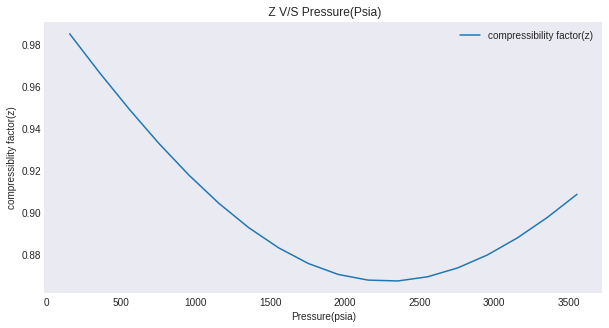

In [40]:
fig , ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
ax1.plot(l6,l5, label = 'compressibility factor(z)')
ax1.set_xlabel("Pressure(psia)")
ax1.set_ylabel("compressiblity factor(z)")
ax1.set_title(" Z V/S Pressure(Psia)")
ax1.legend()

